# Fashion Class Classification

## Business Understanding

The objective of this project is to develop an effective machine learning model for handwritten digit recognition using the MNIST dataset. This task is critical in many practical applications such as automated form processing, postal mail sorting, and financial document analysis. The goal is to enhance the accuracy of digit classification, reduce errors in recognition systems, and ultimately enable faster, automated decision making in various business processes.

## Data Understanding

The MNIST dataset consists of 70,000 grayscale images of handwritten digits (0-9), where each image is 28x28 pixels. The dataset is divided into a training set of 60,000 images and a testing set of 10,000 images. Since the images are standardized and preprocessed, the data is ideal for benchmarking classification models. An exploratory data analysis will include:
- Assessing the distribution of classes (digits) to identify any imbalances.
- Visualizing sample images to understand the variability in handwriting.
- Examining pixel value distributions to determine potential preprocessing needs.
This analysis will help in selecting the appropriate modeling approach, fine-tuning the model architecture, and optimizing performance.

### Features
- **Pixel Values**: Each image is represented as a 28x28 matrix of pixel values (intensity from 0 to 255).
- **Label**: The corresponding digit (0-9) for each image.
- **Training Set**: 60,000 images with labels.
- **Testing Set**: 10,000 images with labels.
- **Classes**: 10 (digits 0-9).
  
### How do I solve this problem?

Artificial Neural Networks (ANN) are a popular choice for image classification tasks due to their ability to learn complex patterns in data. In this project, we will build a deep learning model using TensorFlow and Keras to classify handwritten digits in the MNIST dataset. 

## Data Preparation

### Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [ ]:
import zipfile

# Remove the zip file and extract the contents
with zipfile.ZipFile('P39-Fashion-MNIST-Datasets.zip', 'r') as zip_ref:
    zip_ref.extractall()
    
#Delete the zip file
import os
os.remove('P39-Fashion-MNIST-Datasets.zip')

In [4]:
fashion_train_df = pd.read_csv('fashion-mnist_train.csv',sep=',')
fashion_test_df = pd.read_csv('fashion-mnist_test.csv', sep = ',')

In [5]:
def grab_col_names(dataframe, categorical_threshold=10, cardinal_threshold=20):
    """
    It gives the names of categorical, numerical and categorical but cardinal,nominal variables in the data set.
    Note: Categorical variables but numerical variables are also included in categorical variables.

    Parameters
    ----------
    dataframe : dataframe
        The dataframe from which variables names are to be retrieved.
    categorical_threshold : int, optional
        class threshold for numeric but categorical variables
    cardinal_threshold : int, optional
        Class threshold for categorical but cardinal variables

    Returns
    -------
        categorical_cols : list
            Categorical variable list
        numerical_cols : list
            Numerical variable list
        cardinal_cols : list
            Categorical looking cardinal variable list

    Examples
    -------
        import seaborn as sns
        df = sns.load_titanic_dataset("iris")
        print(grab_col_names(df))

    Notes
    -------
        categorical_cols + numerical_cols + cardinal_cols = total number of variables.
        nominal_cols is inside categorical_cols
        The sum of the 3 returned lists equals the total number of variables: categorical_cols + cardinal_cols = number of variables

    """

    categorical_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    nominal_cols = [col for col in dataframe.columns if
                    dataframe[col].nunique() < categorical_threshold and dataframe[col].dtypes != "O"]
    cardinal_cols = [col for col in dataframe.columns if
                     dataframe[col].nunique() > cardinal_threshold and dataframe[col].dtypes == "O"]
    categorical_cols = categorical_cols + nominal_cols
    categorical_cols = [col for col in categorical_cols if col not in cardinal_cols]

    # numerical_cols
    numerical_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    numerical_cols = [col for col in numerical_cols if col not in categorical_cols]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'categorical_cols: {len(categorical_cols)}')
    print(f'numerical_cols: {len(numerical_cols)}')
    print(f'cardinal_cols: {len(cardinal_cols)}')
    print(f'nominal_cols: {len(nominal_cols)}')
    return categorical_cols, numerical_cols, cardinal_cols, nominal_cols

In [6]:
# Değişken türlerin ayrıştırılması
categorical_cols, numerical_cols, cardinal_cols, nominal_cols = grab_col_names(fashion_train_df, categorical_threshold=5, cardinal_threshold=20)

Observations: 60000
Variables: 785
categorical_cols: 0
numerical_cols: 785
cardinal_cols: 0
nominal_cols: 0


In [7]:
"""

Description:
-----------

Algorithm print out comprises missing ratios and unique values of each column i a given dataframe


R&D:
---

Add '#_infinity_' column to the dataframe

"""

def MissingUniqueStatistics(df):

  import io
  import pandas as pd
  import psutil, os, gc, time
  import seaborn as sns
  from IPython.display import display, HTML
  # pd.set_option('display.max_colwidth', -1)
  from io import BytesIO
  import base64

  print("MissingUniqueStatistics process has began:\n")
  proc = psutil.Process(os.getpid())
  gc.collect()
  mem_0 = proc.memory_info().rss
  start_time = time.time()

  # def createFigure(col):
  #     fig, ax = plt.subplots(figsize=(.4, .4))
  #     fig.subplots_adjust(0,0,1,1)
  #     ax.axis("off")
  #     ax.axis([0,1,0,1])
  #     print(col,df.loc[:,col].dtypes)

  #     if df.loc[:,col].dtype=="object":
  #       sns.catplot(data=df, x=col, kind="count")
  #     else:
  #       sns.distplot(df.loc[:,col], color="m")
  #     # c = plt.hist(df.loc[:,col])
  #     #ax.add_patch(c)
  #     return fig

  # # def fig2inlinehtml(fig):
  # #     figfile = BytesIO()
  # #     fig.savefig(figfile, format='png')
  # #     figfile.seek(0)
  # #     figdata_png = base64.b64encode(figfile.getvalue()).decode()
  # #     imgstr = '<img src="data:image/png;base64,{}" />'.format(figdata_png)
  # #     return imgstr

  # def mapping(col):
  #   fig = createFigure(col)
  #   fname = "./map_{}.png".format(col)
  #   fig.savefig(fname)
  #   imgstr = '<img src="{}" /> '.format(fname)
  #   return imgstr
  #   # fig = createFigure(col)
  #   # return fig2inlinehtml(fig)

  variable_name_list = []
  total_entry_list = []
  data_type_list = []
  unique_values_list = []
  number_of_unique_values_list = []
  missing_value_number_list = []
  missing_value_ratio_list = []
  mean_list=[]
  std_list=[]
  min_list=[]
  Q1_list=[]
  Q2_list=[]
  Q3_list=[]
  max_list=[]

  df_statistics = df.describe().copy()

  for col in df.columns:

    variable_name_list.append(col)
    total_entry_list.append(df.loc[:,col].shape[0])
    data_type_list.append(df.loc[:,col].dtype)
    unique_values_list.append(list(df.loc[:,col].unique()))
    number_of_unique_values_list.append(len(list(df.loc[:,col].unique())))
    missing_value_number_list.append(df.loc[:,col].isna().sum())
    missing_value_ratio_list.append(round((df.loc[:,col].isna().sum()/df.loc[:,col].shape[0]),4))

    try:
      mean_list.append(df_statistics.loc[:,col][1])
      std_list.append(df_statistics.loc[:,col][2])
      min_list.append(df_statistics.loc[:,col][3])
      Q1_list.append(df_statistics.loc[:,col][4])
      Q2_list.append(df_statistics.loc[:,col][5])
      Q3_list.append(df_statistics.loc[:,col][6])
      max_list.append(df_statistics.loc[:,col][7])
    except:
      mean_list.append('NaN')
      std_list.append('NaN')
      min_list.append('NaN')
      Q1_list.append('NaN')
      Q2_list.append('NaN')
      Q3_list.append('NaN')
      max_list.append('NaN')

  data_info_df = pd.DataFrame({'Variable': variable_name_list,
                               '#_Total_Entry':total_entry_list,
                               '#_Missing_Value': missing_value_number_list,
                               '%_Missing_Value':missing_value_ratio_list,
                               'Data_Type': data_type_list,
                               'Unique_Values': unique_values_list,
                               '#_Unique_Values':number_of_unique_values_list,
                               'Mean':mean_list,
                               'STD':std_list,
                               'Min':min_list,
                               'Q1':Q1_list,
                               'Q2':Q2_list,
                               'Q3':Q3_list,
                               'Max':max_list
                               })

  data_info_df = data_info_df.set_index("Variable", inplace=False)

  # data_info_df['pdf'] = np.nan
  # for col in data_info_df.index:
  #   data_info_df.loc[col,'pdf'] = mapping(col)

  print('MissingUniqueStatistics process has been completed!')
  print("--- in %s minutes ---" % ((time.time() - start_time)/60))

  return data_info_df.sort_values(by='%_Missing_Value', ascending=False)#, HTML(df.to_html(escape=False, formatters=dict(col=mapping)))

In [8]:
data_info = MissingUniqueStatistics(fashion_train_df)
# data_info = data_info.set_index("Variable")
data_info

MissingUniqueStatistics process has began:



C:\Users\Eda AYDIN\AppData\Local\Temp\ipykernel_47040\3919564226.py:93: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mean_list.append(df_statistics.loc[:,col][1])
C:\Users\Eda AYDIN\AppData\Local\Temp\ipykernel_47040\3919564226.py:94: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  std_list.append(df_statistics.loc[:,col][2])
C:\Users\Eda AYDIN\AppData\Local\Temp\ipykernel_47040\3919564226.py:95: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc

MissingUniqueStatistics process has been completed!
--- in 0.08608201742172242 minutes ---


,#_Total_Entry,#_Missing_Value,%_Missing_Value,Data_Type,Unique_Values,#_Unique_Values,Mean,STD,Min,Q1,Q2,Q3,Max
Variable,,,,,,,,,,,,,
label,60000,0,0.0,int64,"[2, 9, 6, 0, 3, 4, 5, 8, 7, 1]",10,4.500000,2.872305,0.0,2.0,4.5,7.0,9.0
pixel516,60000,0,0.0,int64,"[202, 152, 203, 113, 220, 110, 228, 0, 208, 15...",256,155.503117,69.830373,0.0,110.0,176.0,213.0,255.0
pixel518,60000,0,0.0,int64,"[207, 150, 198, 224, 218, 174, 226, 0, 212, 16...",256,144.048167,77.221384,0.0,85.0,166.0,210.0,255.0
pixel519,60000,0,0.0,int64,"[208, 134, 206, 210, 219, 160, 222, 0, 194, 21...",256,139.624033,80.359742,0.0,75.0,163.0,209.0,255.0
pixel520,60000,0,0.0,int64,"[209, 136, 218, 191, 220, 167, 208, 0, 211, 16...",256,150.505817,74.259175,0.0,97.0,172.0,213.0,255.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
pixel264,60000,0,0.0,int64,"[215, 2, 189, 52, 240, 170, 223, 0, 212, 179, ...",256,110.531767,89.172699,0.0,1.0,122.0,196.0,255.0
pixel265,60000,0,0.0,int64,"[210, 0, 184, 54, 219, 137, 220, 223, 214, 108...",256,113.928000,89.370555,0.0,1.0,127.0,199.0,255.0
pixel266,60000,0,0.0,int64,"[209, 3, 202, 106, 221, 144, 207, 0, 194, 222,...",256,118.740083,86.631193,0.0,19.0,133.0,199.0,255.0


In [9]:
%matplotlib inline
# Histogram of the target categories
from matplotlib import ticker


def histogram(df,feature, save_fig=False,path=None):
    #df = input("Enter a DataFrame name: ")
    #col = input("Enter a target column name: ")
    #df=eval(df)
    ncount = len(df)
    ax = sns.countplot(x = feature, data=df ,palette="hls")
    sns.set(font_scale=1)
    ax.set_xlabel('Target Segments')
    plt.xticks(rotation=90)
    ax.set_ylabel('Number of Observations')
    fig = plt.gcf()
    fig.set_size_inches(12,5)
    # Make twin axis
    ax2=ax.twinx()
    # Switch so count axis is on right, frequency on left
    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()
    # Also switch the labels over
    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')
    ax2.set_ylabel('Frequency [%]')
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.2f}%'.format(100.*y/ncount), (x.mean(), y),
                ha='center', va='bottom') # set the alignment of the text
    # Use a LinearLocator to ensure the correct number of ticks
    ax.yaxis.set_major_locator(ticker.LinearLocator(11))
    # Fix the frequency range to 0-100
    ax2.set_ylim(0,100)
    ax.set_ylim(0,ncount)
    # And use a MultipleLocator to ensure a tick spacing of 10
    ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))
    # Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
    ax2.grid(None)
    plt.title('Histogram of Binary Target Categories', fontsize=20, y=1.08)
    plt.show()
    if save_fig:
        fig.savefig(path + "histogram.png")
    del ncount, x, y

C:\Users\Eda AYDIN\AppData\Local\Temp\ipykernel_47040\1652913986.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = feature, data=df ,palette="hls")


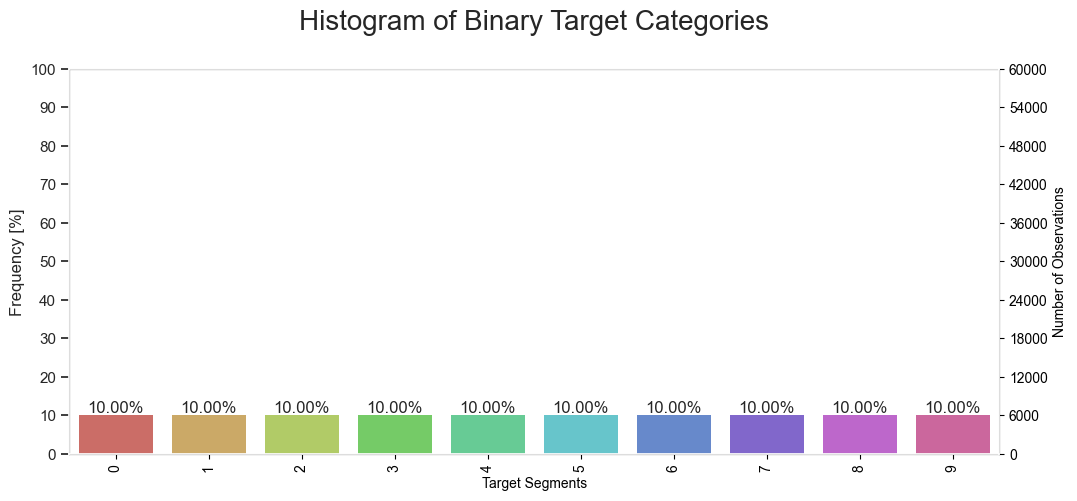

In [12]:
import os

images_path = "./graphs/"

if not os.path.exists(images_path):
    os.makedirs(images_path)

histogram(fashion_train_df, 'label', save_fig=True, path=images_path)

## Data Analysis

In [13]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
fashion_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [16]:
fashion_train_df.shape

(60000, 785)

In [17]:
# Create training and testing arrays
training = np.array(fashion_train_df, dtype = 'float32')
testing = np.array(fashion_test_df, dtype='float32')

In [18]:
training.shape

(60000, 785)

In [19]:
training

array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [20]:
testing

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 1., 0.],
       [8., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

7.0

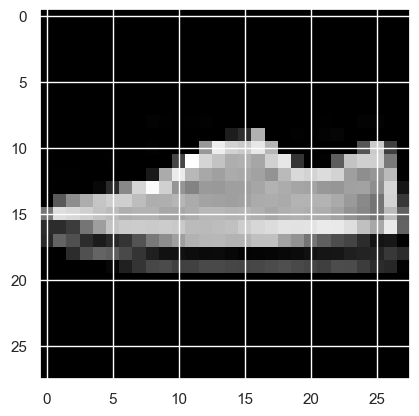

In [23]:
i = random.randint(1,60000)
plt.imshow(training[i, 1:].reshape(28,28), cmap='gray')
label = training[i,0]
label

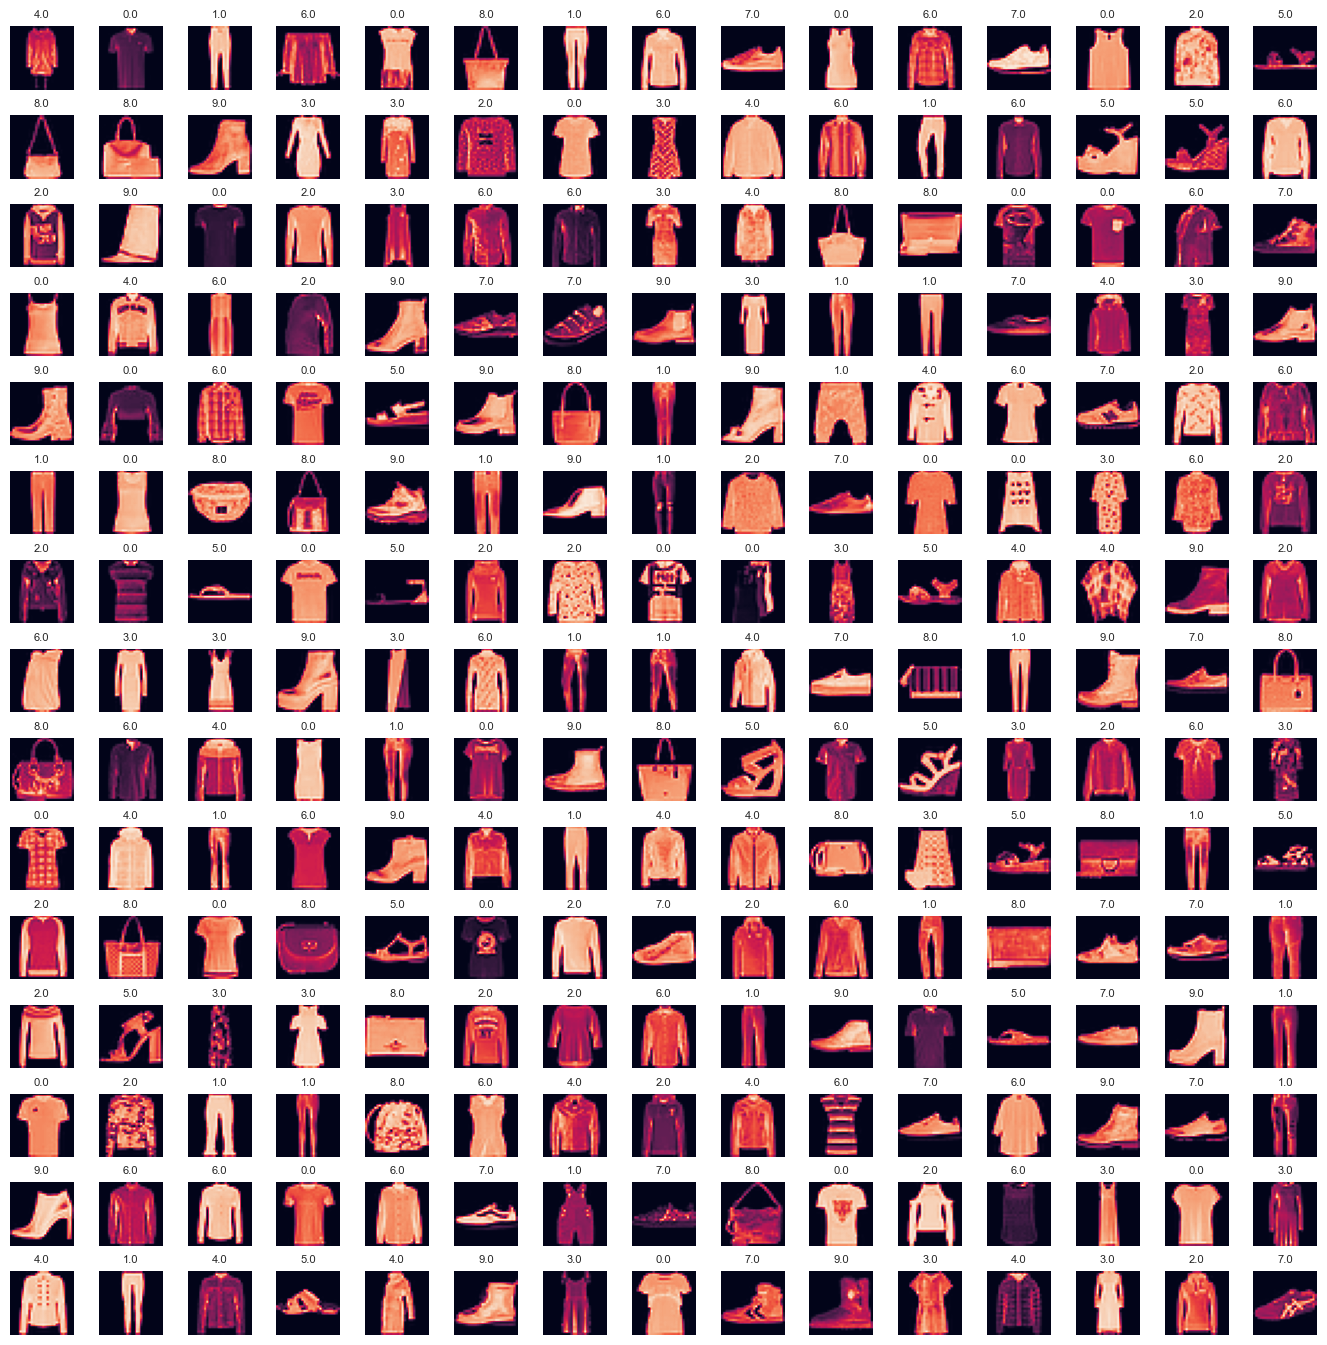

In [24]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(nrows=L_grid, ncols=W_grid, figsize=(17,17))

# Flatten the 15x15 matrix into 225 array
axes = axes.ravel()

# Get the length of the training dataset
n_training = len(training)

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid):
    # Select a random number
    index = np.random.randint(0, n_training)
    # Read and display an image with the selected index
    axes[i].imshow(training[index, 1:].reshape((28,28)))
    axes[i].set_title(training[index, 0], fontsize=8)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace=0.4)

## Modeling

- Convolutions use a kernel matrix to scan a given image and apply a filter to obtain a certain effect.
- An image Kernel is a matrix used to apply effects such as blurring and sharpening.
- Kernels are used in machine learning for feature extraction to select most important pixels of an image.
- Convolution preserves the spatial relationship between pixels by learning image features using small squares of input data.

**Kernels / Feature Detectors**
- Small matrices used to extract features from input images. (Bir giriş resminden özellikler çıkarmak için kullanılan küçük matrisler.)

**Feature maps**
- The output of applying a kernel to an input image. (Bir kernel'ın bir girdi resme uygulanmasının çıktısı.)

**Relu**
  - Rectified Linear Unit, Activation function that allows a model to solve nonlinear problems.
  -  Relu is applied after the feature detection process, after applying the convolution, before pooling.
  -  It also enhances the sparsity or how scattered the feature map is.
  -  The gradient of the RELU does not vanish as we increase x compared to the sigmoid function.

**Max Pooling**
  - Reduces the dimensionality of each feature map but retains the most important information.
  - Pooling or down sampling layers are placed after convolutional layers to reduce feature map dimensionality.
  - This improves the computational efficiency while preserving the features.
  - Pooling helps the model to generalize by avoiding overfitting. If one of the pixel is shifted, the pooled feature map will still be the same.
  - Max pooling works by retaining the maximum feature response within a given sample size in a feature map.

**Flattening**
- Flattening is the process of converting all the resultant 2D arrays into a single long continuous linear vector.

Convolution -> Pooling -> Flattening -> Full Connection

In [28]:
X_train = training[:,1:]/255 # Normalizing the data
y_train = training[:,0]

X_test = testing[:,1:]/255
y_test = testing[:,0]

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

In [30]:
X_train.shape

(48000, 784)

In [31]:
y_train.shape

(48000,)

In [32]:
# Reshape the data
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

In [33]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("X_validate shape: ", X_validate.shape)

X_train shape:  (48000, 28, 28, 1)
X_test shape:  (10000, 28, 28, 1)
X_validate shape:  (12000, 28, 28, 1)


In [34]:
import keras
from keras.models import Sequential # for initializing the neural network
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout # Conv2D for convolution operation, MaxPooling2D for pooling operation, Flatten for flattening, Dense for adding layers, Dropout for dropout regularization
from keras.optimizers import Adam # Adam optimizer
from keras.callbacks import TensorBoard # TensorBoard for visualization

In [40]:
# Initialising the CNN
cnn_model = Sequential()

# Starting with the first convolutional layer
cnn_model.add(Conv2D(64,3, 3, input_shape = (28,28,1), activation='relu')) # 64 filters, 3x3 filter size, input_shape = (28,28,1), activation function = 'relu'

# Adding a pooling layer
cnn_model.add(MaxPooling2D(pool_size = (2,2))) # 2x2 pool size

# Adding a dropout layer
cnn_model.add(Dropout(0.25)) # 25% dropout

# Adding Flatten layer
cnn_model.add(Flatten())

# Adding Dense layer
cnn_model.add(Dense(units = 32, activation = 'relu')) # 32 neurons, activation function = 'relu'

# Adding output layer
cnn_model.add(Dense(units=10, activation="sigmoid")) # 10 neurons (number of classes), activation function = 'sigmoid'

c:\Users\Eda AYDIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
cnn_model.compile(loss="sparse_categorical_crossentropy",  # sparse_categorical_crossentropy for multiclass classification
                  optimizer=Adam(learning_rate=0.001),
                  metrics=['accuracy'])

In [42]:
epochs = 50

history = cnn_model.fit(X_train,
                        y_train,
                        batch_size=512,
                        epochs = epochs,
                        verbose = 1,
                        validation_data = (X_validate, y_validate))

Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.4217 - loss: 1.7113 - val_accuracy: 0.7366 - val_loss: 0.7391
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7368 - loss: 0.7222 - val_accuracy: 0.7822 - val_loss: 0.6021
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7754 - loss: 0.6192 - val_accuracy: 0.8039 - val_loss: 0.5497
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7913 - loss: 0.5678 - val_accuracy: 0.8135 - val_loss: 0.5186
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8051 - loss: 0.5378 - val_accuracy: 0.8160 - val_loss: 0.5068
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8112 - loss: 0.5171 - val_accuracy: 0.8233 - val_loss: 0.4880
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8177 - loss: 0.5015 - val_accuracy: 0.8319 - val_loss: 0.4641
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8233 - loss: 0.4870 - val_accuracy: 0.8372 - v

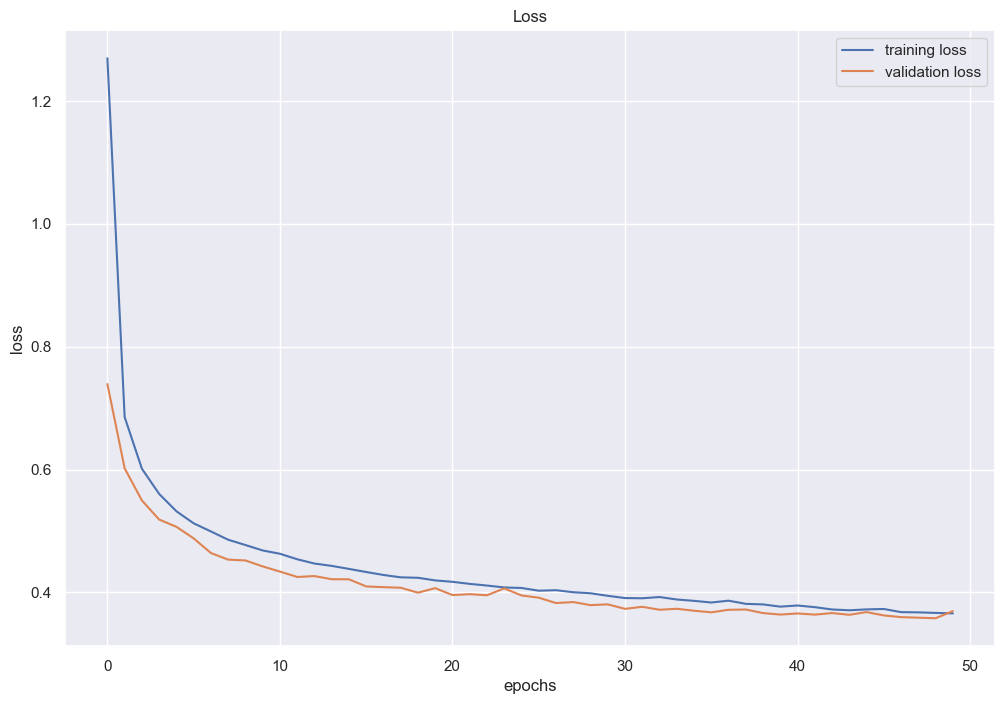

In [43]:
# Plot the loss and accuracy curves for training and validation
plt.figure(figsize=(12, 8))
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


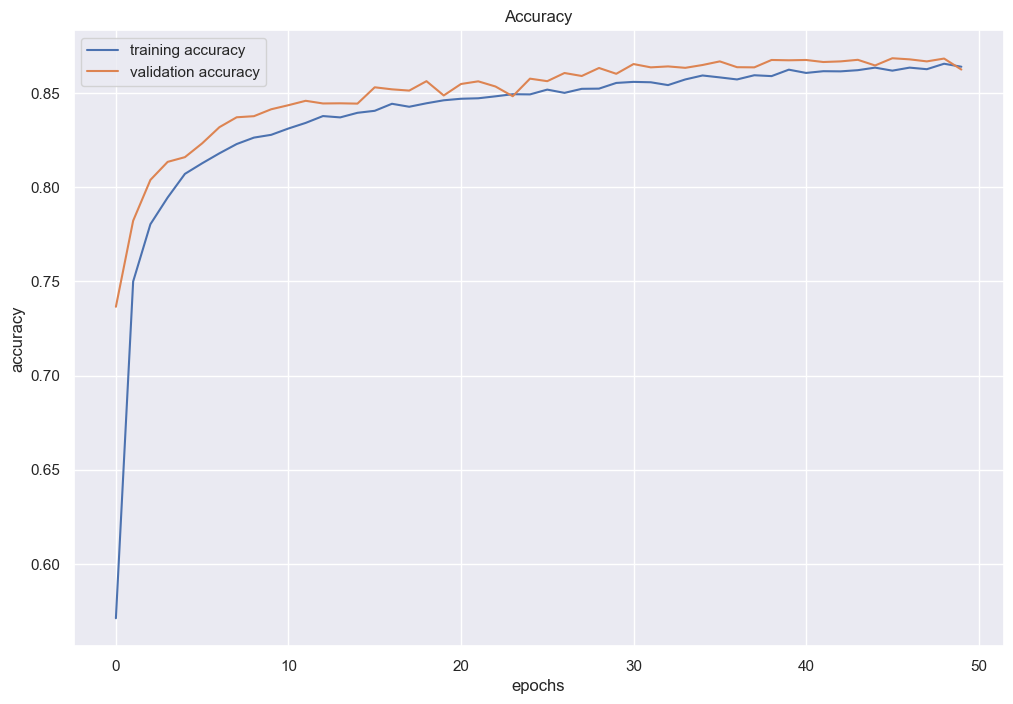

In [44]:
# Plot the loss and accuracy curves for training and validation
plt.figure(figsize=(12, 8))
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()


## Evaluation

In [45]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8682 - loss: 0.3512
Test Accuracy: 0.8697999715805054


In [50]:
# get the predictions for the test data
predictions = cnn_model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


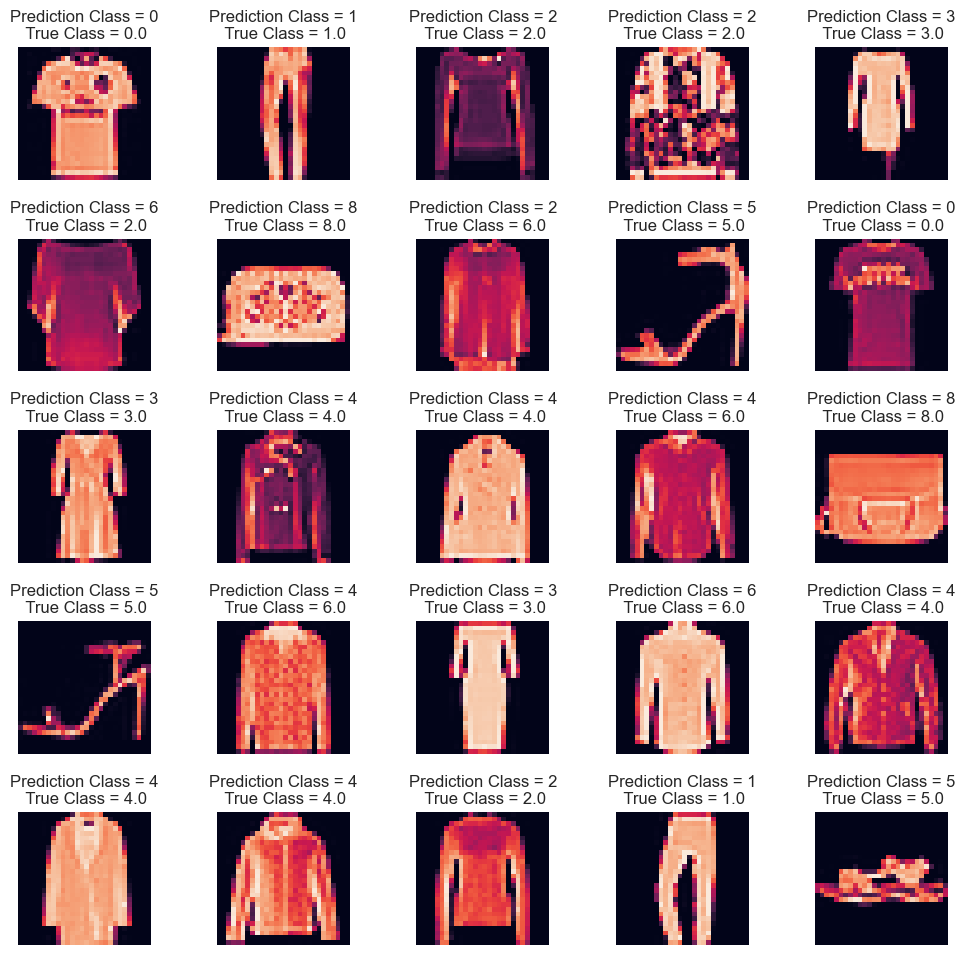

In [51]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L * W):
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {}\n True Class = {}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')
    
plt.subplots_adjust(wspace=0.5)

<Axes: >

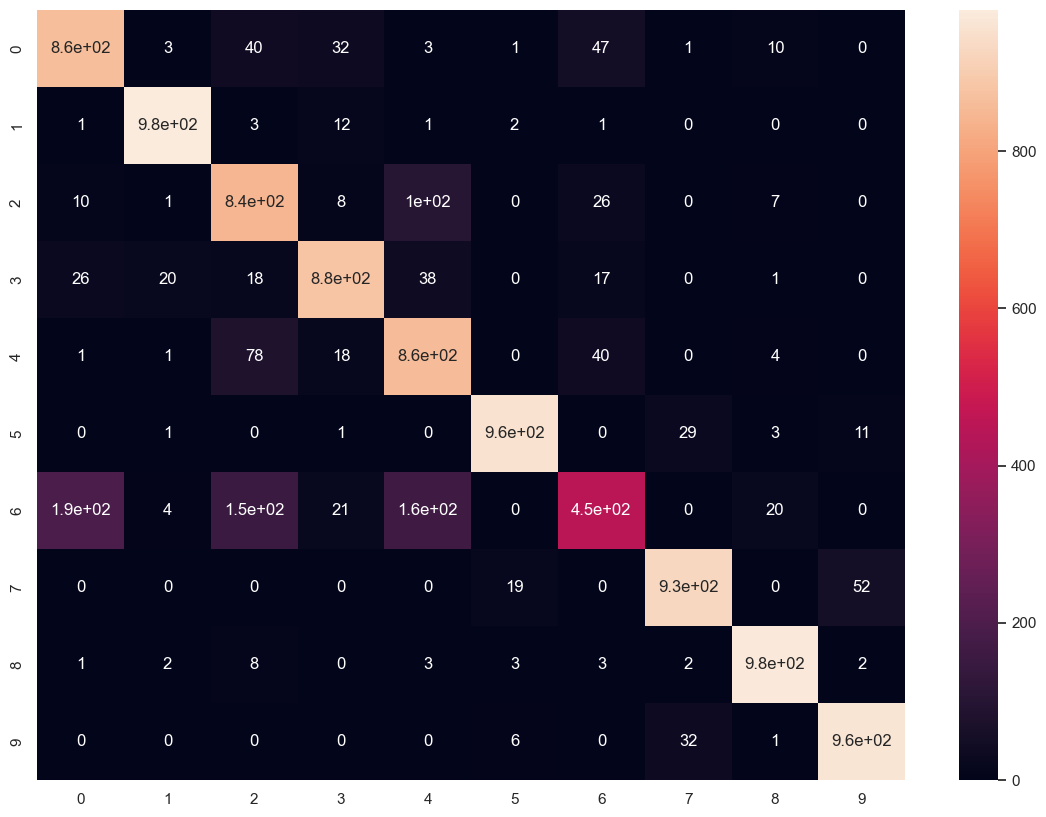

In [52]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14, 10))
sns.heatmap(cm, annot=True)

In [53]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.79      0.86      0.82      1000
     Class 1       0.97      0.98      0.97      1000
     Class 2       0.74      0.84      0.79      1000
     Class 3       0.91      0.88      0.89      1000
     Class 4       0.74      0.86      0.79      1000
     Class 5       0.97      0.95      0.96      1000
     Class 6       0.77      0.45      0.57      1000
     Class 7       0.94      0.93      0.93      1000
     Class 8       0.95      0.98      0.97      1000
     Class 9       0.94      0.96      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.86     10000
weighted avg       0.87      0.87      0.86     10000



## Improving the Model


In [55]:
print("Test Accuracy: {}".format(evaluation[1]))

Test Accuracy: 0.8697999715805054


In [59]:
# (32,3,3) kernel without dropout
cnn_model2 = Sequential()

cnn_model2.add(Conv2D(32,3, 3, input_shape = (28,28,1), activation='relu'))
cnn_model2.add(MaxPooling2D(pool_size = (2,2))) 
cnn_model2.add(Flatten())
cnn_model2.add(Dense(units = 32, activation = 'relu'))
cnn_model2.add(Dense(units=10, activation="sigmoid"))

cnn_model2.compile(loss="sparse_categorical_crossentropy",
                    optimizer=Adam(learning_rate=0.001),
                    metrics=['accuracy'])

epochs = 50

history2 = cnn_model2.fit(X_train,
                          y_train,
                          batch_size=512,
                          epochs = epochs,
                          verbose = 1,
                          validation_data = (X_validate, y_validate))



Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.3953 - loss: 1.8615 - val_accuracy: 0.7348 - val_loss: 0.7711
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7462 - loss: 0.7186 - val_accuracy: 0.7724 - val_loss: 0.6233
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7791 - loss: 0.6116 - val_accuracy: 0.7931 - val_loss: 0.5700
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7974 - loss: 0.5595 - val_accuracy: 0.8062 - val_loss: 0.5375
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8074 - loss: 0.5308 - val_accuracy: 0.8160 - val_loss: 0.5135
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8179 - loss: 0.5099 - val_accuracy: 0.8223 - val_loss: 0.4957
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8246 - loss: 0.4834 - val_accuracy: 0.8213 - val_loss: 0.4890
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8260 - loss: 0.4763 - val_accuracy: 0.8254 - val_loss:

In [60]:

# Show the accuracy on the test data
evaluation2 = cnn_model2.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation2[1]))


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8648 - loss: 0.3574
Test Accuracy: 0.8711000084877014


In [61]:
# (64,3,3) kernel without dropout
cnn_model3 = Sequential()

cnn_model3.add(Conv2D(64,3, 3, input_shape = (28,28,1), activation='relu'))
cnn_model3.add(MaxPooling2D(pool_size = (2,2)))
cnn_model3.add(Flatten())
cnn_model3.add(Dense(units = 32, activation = 'relu'))
cnn_model3.add(Dense(units=10, activation="sigmoid"))

cnn_model3.compile(loss="sparse_categorical_crossentropy",
                   optimizer=Adam(learning_rate=0.001),
                   metrics=['accuracy'])

epochs = 50

history3 = cnn_model3.fit(X_train,
                          y_train,
                          batch_size=512,
                          epochs = epochs,
                          verbose = 1,
                          validation_data = (X_validate, y_validate))



Epoch 1/50


c:\Users\Eda AYDIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4383 - loss: 1.7641 - val_accuracy: 0.7370 - val_loss: 0.7193
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7495 - loss: 0.6838 - val_accuracy: 0.7912 - val_loss: 0.5869
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7945 - loss: 0.5683 - val_accuracy: 0.8148 - val_loss: 0.5260
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8149 - loss: 0.5179 - val_accuracy: 0.8219 - val_loss: 0.4974
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8244 - loss: 0.4871 - val_accuracy: 0.8325 - val_loss: 0.4725
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8325 - loss: 0.4624 - val_accuracy: 0.8336 - val_loss: 0.4573
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8410 - loss: 0.4453 - val_accuracy: 0.8413 - val_loss: 0.4428
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8446 - loss: 0.4315 - val_accuracy: 0.8460 - val_loss: 0.4288
Ep

In [62]:

# Show the accuracy on the test data
evaluation3 = cnn_model3.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation3[1]))


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8747 - loss: 0.3344
Test Accuracy: 0.880299985408783


In [63]:
# (64,3,3) kernel with dropout

cnn_model4 = Sequential()

cnn_model4.add(Conv2D(64,3, 3, input_shape = (28,28,1), activation='relu'))
cnn_model4.add(MaxPooling2D(pool_size = (2,2)))
cnn_model4.add(Dropout(0.25))
cnn_model4.add(Flatten())
cnn_model4.add(Dense(units = 32, activation = 'relu'))
cnn_model4.add(Dense(units=10, activation="sigmoid"))

cnn_model4.compile(loss="sparse_categorical_crossentropy",
                   optimizer=Adam(learning_rate=0.001),
                   metrics=['accuracy'])

epochs = 50

history4 = cnn_model4.fit(X_train,
                          y_train,
                          batch_size=512,
                          epochs = epochs,
                          verbose = 1,
                          validation_data = (X_validate, y_validate))


Epoch 1/50


c:\Users\Eda AYDIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.4309 - loss: 1.7520 - val_accuracy: 0.7408 - val_loss: 0.7200
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7443 - loss: 0.6931 - val_accuracy: 0.7823 - val_loss: 0.5903
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7814 - loss: 0.5935 - val_accuracy: 0.8033 - val_loss: 0.5375
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8008 - loss: 0.5473 - val_accuracy: 0.8179 - val_loss: 0.5026
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8100 - loss: 0.5262 - val_accuracy: 0.8272 - val_loss: 0.4775
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8208 - loss: 0.4983 - val_accuracy: 0.8317 - val_loss: 0.4623
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8264 - loss: 0.4763 - val_accuracy: 0.8316 - val_loss: 0.4579
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8254 - loss: 0.4760 - val_accuracy: 0.8363 - val_loss: 0.

In [64]:
# Show the accuracy on the test data
evaluation4 = cnn_model4.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation4[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8713 - loss: 0.3379
Test Accuracy: 0.8779000043869019


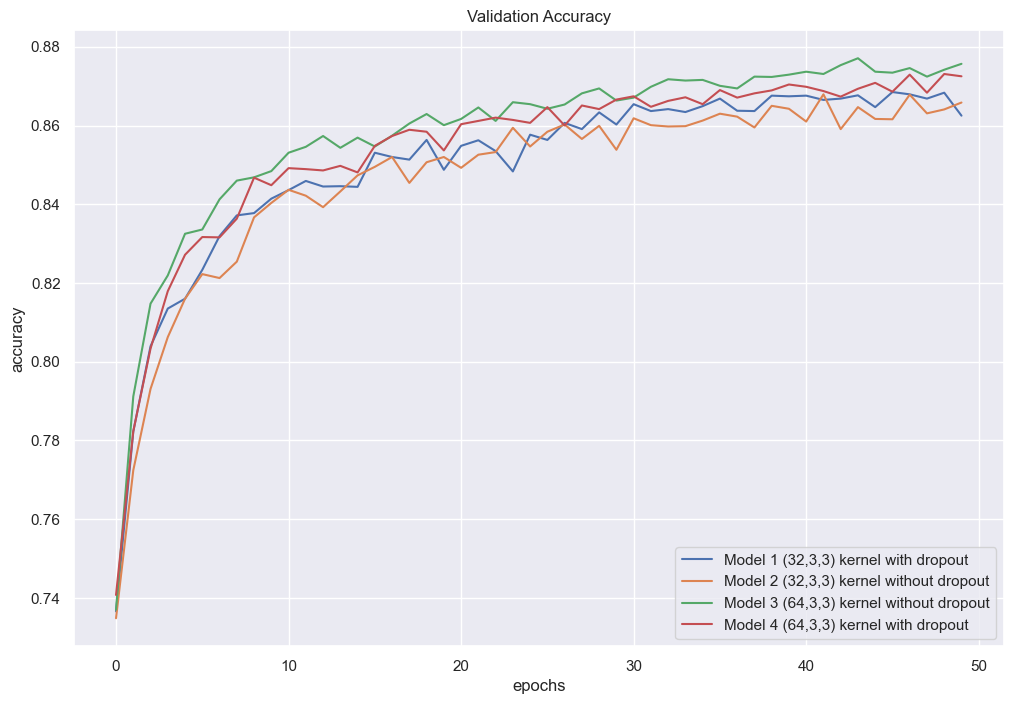

In [66]:
# Compare all models
plt.figure(figsize=(12, 8))
plt.plot(history.history['val_accuracy'], label='Model 1 (32,3,3) kernel with dropout')
plt.plot(history2.history['val_accuracy'], label='Model 2 (32,3,3) kernel without dropout')
plt.plot(history3.history['val_accuracy'], label='Model 3 (64,3,3) kernel without dropout')
plt.plot(history4.history['val_accuracy'], label='Model 4 (64,3,3) kernel with dropout')
plt.title('Validation Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()